Project 3 : Sentiment Analysis using Twitter Dataset

Problem Statement: Build a sentiment analysis on twitter dataset using any deep learning technique.

Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140


In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DS_Datasets/tweets/tweets_processed2023.csv')

In [5]:
df

,Unnamed: 0,polarity,Tweet,Tweet_processed
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
...,...,...,...,...
1599995,1599995,1,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599996,1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview â
1599997,1599997,1,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599998,1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...


In [8]:
# identification of common words in processed tweets
from collections import Counter
word_counter = Counter()

# Iterate through each line (text) in the 'text' column
for line in df['Tweet_processed']:
    if isinstance(line, str):
        # Split the line into words, convert to lowercase, and filter out short words
        words = [word.lower() for word in line.split() if len(word) > 2]
        # Update the word_counter with the words from the current line
        word_counter.update(words)

# Get the 100 most common words and their frequencies
common_words = word_counter.most_common(100)

# Print the most common words and their frequencies
common_words

[('day', 99263),
 ('good', 85930),
 ('get', 82986),
 ('like', 76072),
 ('got', 67896),
 ('today', 64865),
 ('dont', 64794),
 ('work', 64039),
 ('love', 63835),
 ('going', 62300),
 ('time', 61811),
 ('cant', 61339),
 ('back', 54460),
 ('one', 53542),
 ('lol', 52569),
 ('know', 51496),
 ('want', 46960),
 ('really', 46636),
 ('see', 44959),
 ('well', 43462),
 ('think', 42751),
 ('still', 42076),
 ('night', 41510),
 ('new', 40434),
 ('need', 39586),
 ('thanks', 39117),
 ('home', 38209),
 ('amp', 37077),
 ('miss', 36837),
 ('much', 35824),
 ('last', 34792),
 ('feel', 34513),
 ('make', 33768),
 ('hope', 33490),
 ('morning', 32908),
 ('tomorrow', 32894),
 ('great', 31781),
 ('twitter', 31648),
 ('ill', 30824),
 ('thats', 30159),
 ('wish', 29509),
 ('haha', 29329),
 ('come', 27796),
 ('sad', 27776),
 ('fun', 27082),
 ('right', 27075),
 ('week', 26565),
 ('didnt', 26450),
 ('sleep', 26212),
 ('bad', 25972),
 ('would', 25746),
 ('thing', 25568),
 ('happy', 25495),
 ('sorry', 25044),
 ('tonight',

In [14]:
# identification of common words in negative tweets
from collections import Counter

# Create a Counter to count words
word_counter = Counter()

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Check if the tweet has a negative polarity
    if row['polarity'] == 0:
        # Check if the 'Tweet_processed' column is a string
        if isinstance(row['Tweet_processed'], str):
            # Split the tweet into words, convert to lowercase, and filter out short words
            words = [word.lower() for word in row['Tweet_processed'].split() if len(word) > 2]
            # Update the word_counter with the words from the current tweet
            word_counter.update(words)

# Get the 100 most common words in negative tweets and their frequencies
common_words_neg_tweets = word_counter.most_common(100)

# Print the most common words in negative tweets and their frequencies
common_words_neg_tweets

[('day', 47873),
 ('get', 46118),
 ('work', 43883),
 ('dont', 43434),
 ('cant', 42596),
 ('like', 39637),
 ('got', 37091),
 ('today', 36190),
 ('want', 33070),
 ('going', 32479),
 ('back', 31564),
 ('miss', 31109),
 ('time', 29674),
 ('really', 29098),
 ('still', 28259),
 ('good', 27737),
 ('one', 27111),
 ('sad', 26380),
 ('know', 25989),
 ('feel', 24725),
 ('need', 24615),
 ('home', 23260),
 ('wish', 23191),
 ('think', 22631),
 ('last', 21783),
 ('bad', 20692),
 ('lol', 20568),
 ('sorry', 19998),
 ('see', 19939),
 ('night', 19596),
 ('didnt', 19581),
 ('well', 19530),
 ('much', 19396),
 ('tomorrow', 18588),
 ('hate', 18294),
 ('make', 17300),
 ('sleep', 17169),
 ('amp', 16991),
 ('love', 16771),
 ('week', 15367),
 ('new', 14860),
 ('hope', 14749),
 ('right', 14691),
 ('though', 14368),
 ('come', 14262),
 ('ill', 13722),
 ('sick', 13646),
 ('could', 13256),
 ('morning', 13227),
 ('getting', 13227),
 ('would', 13155),
 ('thing', 13109),
 ('hour', 12970),
 ('ive', 12905),
 ('thats', 128

In [15]:
# identification of common words in positive tweets
word_counter = Counter()
for index, row in df.iterrows():
    if row['polarity'] == 1:
        if isinstance(row['Tweet_processed'], str):
            words = [word.lower() for word in row['Tweet_processed'].split() if len(word) > 2]
            word_counter.update(words)
common_words_pos_tweets = word_counter.most_common(100)
common_words_pos_tweets

[('good', 58193),
 ('day', 51390),
 ('love', 47064),
 ('get', 36868),
 ('like', 36435),
 ('thanks', 33519),
 ('time', 32137),
 ('lol', 32001),
 ('got', 30805),
 ('going', 29821),
 ('today', 28675),
 ('one', 26431),
 ('new', 25574),
 ('know', 25507),
 ('see', 25020),
 ('great', 24011),
 ('well', 23932),
 ('back', 22896),
 ('night', 21914),
 ('dont', 21360),
 ('work', 20156),
 ('think', 20120),
 ('haha', 20096),
 ('amp', 20086),
 ('morning', 19681),
 ('happy', 19359),
 ('twitter', 18920),
 ('cant', 18743),
 ('hope', 18741),
 ('really', 17538),
 ('fun', 17450),
 ('thats', 17264),
 ('ill', 17102),
 ('make', 16468),
 ('much', 16428),
 ('nice', 16237),
 ('thank', 15029),
 ('need', 14971),
 ('home', 14949),
 ('tomorrow', 14306),
 ('watching', 14085),
 ('want', 13890),
 ('awesome', 13888),
 ('still', 13817),
 ('wait', 13753),
 ('come', 13534),
 ('youre', 13434),
 ('hey', 13230),
 ('friend', 13225),
 ('last', 13009),
 ('look', 12816),
 ('yes', 12668),
 ('way', 12639),
 ('would', 12591),
 ('thin

In [16]:
# Bag of Words
import wordcloud
from wordcloud import WordCloud

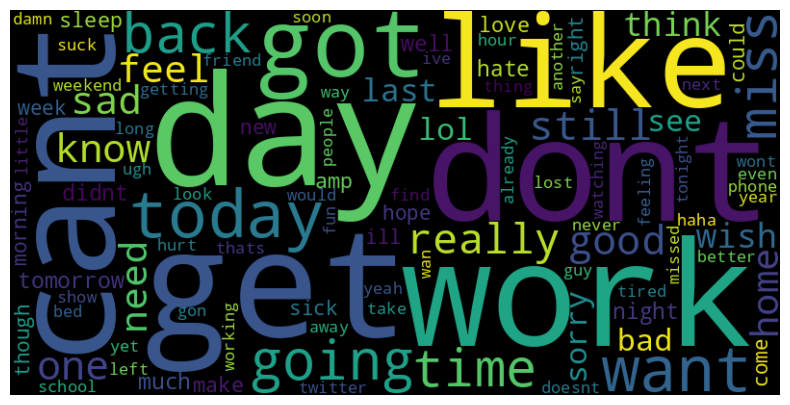

In [17]:
# negative words in tweets
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words_neg_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

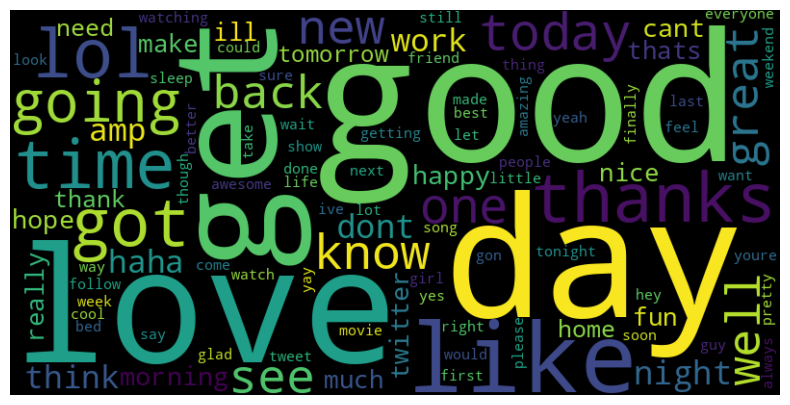

In [18]:
# Word Clouds on Positive Reviews
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words_pos_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

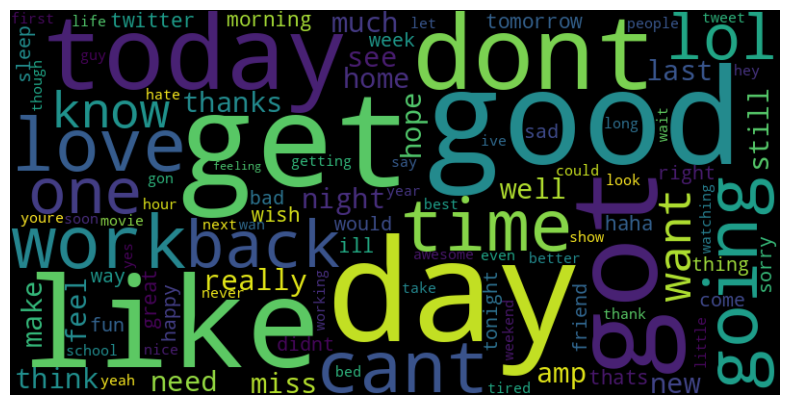

In [19]:
# Overall
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Splitting X(Review) and Y (Sentiment) for Sentiment Analysis
X = df['Tweet_processed'].values
y = df['polarity'].values

In [21]:
X.shape

(1600000,)

In [22]:
y.shape

(1600000,)

In [23]:
# finding compatibility of X and Y Rows
if X.shape[0] == y.shape[0]:
    print("Data is compatible for Analyis")
else:
    print("Data is not compatible for Analyis")

Data is compatible for Analyis


In [31]:
X = [str(text) for text in X]
X = [text.strip() for text in X]

In [32]:
# Tokenisation RNN
import tensorflow
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 3000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  713 1666    2]
 [   0    0    0 ...    8  174 1234]
 [   0    0    0 ...  356    6 2891]
 ...
 [   0    0    0 ...  123  496 1631]
 [   0    0    0 ...  179  398   13]
 [   0    0    0 ...    0    0   57]]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, y, test_size=0.3, random_state=42)

In [34]:
X_train.shape

(1120000, 200)

In [35]:
y_train.shape

(1120000,)

In [36]:
X_test.shape

(480000, 200)

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Define the parameters
max_words = 3000  # Maximum number of words in your vocabulary
embedding_dim = 100  # Dimension of word embeddings
sequence_length = 200  # Maximum sequence length

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=sequence_length))

# LSTM layer
model.add(LSTM(64, return_sequences=True))

# GRU layer
model.add(GRU(32))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 lstm (LSTM)                 (None, 200, 64)           42240     
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 351681 (1.34 MB)
Trainable params: 351681 (1.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
hist = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
35000/35000 [==============================] - 693s 20ms/step - loss: 0.4502 - accuracy: 0.7883 - val_loss: 0.4508 - val_accuracy: 0.7857
Epoch 2/10
35000/35000 [==============================] - 739s 21ms/step - loss: 0.4407 - accuracy: 0.7943 - val_loss: 0.4502 - val_accuracy: 0.7859
Epoch 3/10
35000/35000 [==============================] - 720s 21ms/step - loss: 0.4323 - accuracy: 0.7991 - val_loss: 0.4524 - val_accuracy: 0.7857
Epoch 4/10
35000/35000 [==============================] - 730s 21ms/step - loss: 0.4236 - accuracy: 0.8041 - val_loss: 0.4531 - val_accuracy: 0.7840
Epoch 5/10
35000/35000 [==============================] - 692s 20ms/step - loss: 0.4157 - accuracy: 0.8088 - val_loss: 0.4586 - val_accuracy: 0.7836


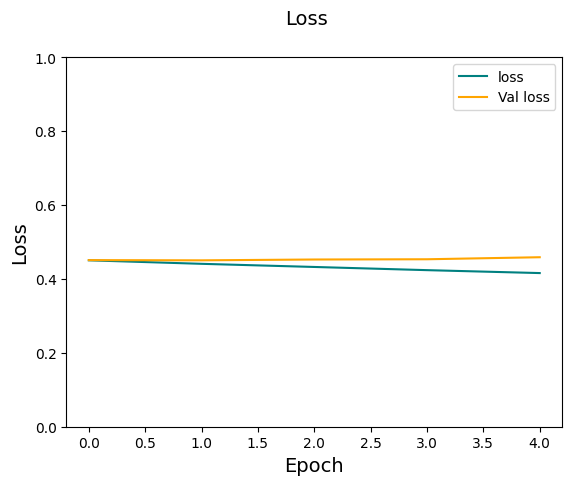

In [41]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

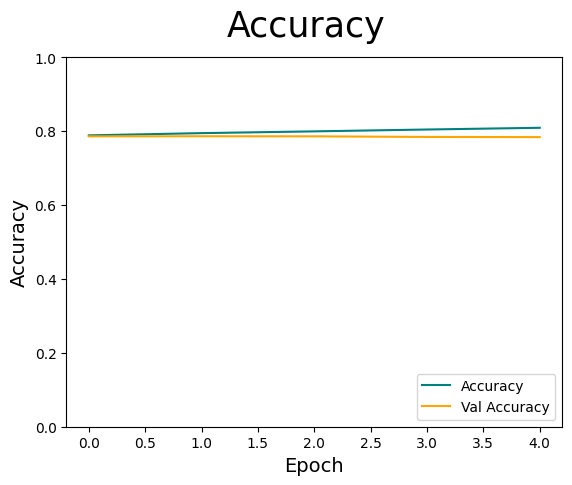

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [43]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict the labels using your model
y_pred = model.predict(X_test)

# Round the predicted probabilities to get binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_binary)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

15000/15000 [==============================] - 102s 7ms/step
Accuracy: 0.7859
Precision: 0.7789
Recall: 0.7999
F1-Score: 0.7893
ROC AUC: 0.8700
Confusion Matrix:
[[184724  54637]
 [ 48148 192491]]


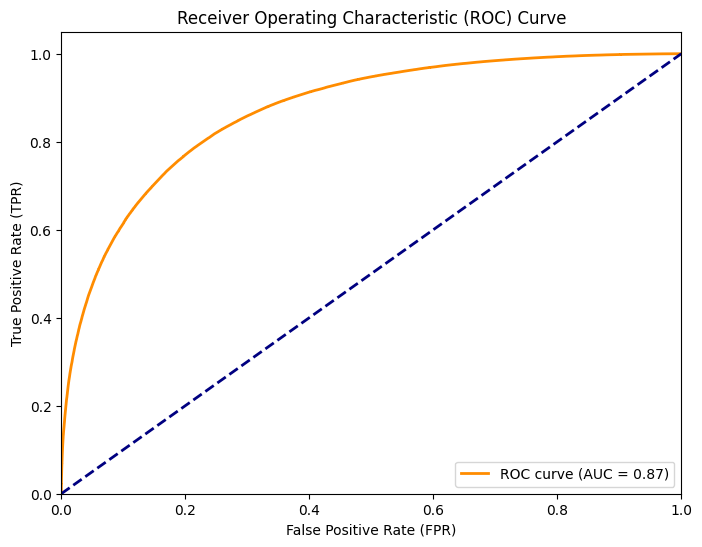

In [44]:
# Intuitive Evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Testing

In [59]:
# Pipeline of Text preprocessing
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# function for lowercasing
def lowercase_text(review):
    return review.lower()

# function for removing URLs
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
def remove_urls(review):
    return re.sub(urlPattern, '', review)

# function for removing usernames
userPattern = '@[^\s]+'
def remove_usernames(review):
    return re.sub(userPattern, '', review)

# function for removing numbers/ years
numberPattern = r'\d'
def remove_numbers(review):
    return re.sub(numberPattern, '', review)

# function for removing punctuation
def remove_punctuation(review):
    return review.translate(str.maketrans('', '', string.punctuation))

# function for tokenization
def tokenize_text(review):
    return word_tokenize(review)

# function for removing stopwords
def remove_stopwords(tokens):
    return [w for w in tokens if w not in stopword]

# Instanciate WordNet Lemmatizer
wordLemm = WordNetLemmatizer()

# function for lemmatization
def lemmatize_words(tokens):
    return [wordLemm.lemmatize(w) for w in tokens if len(w) > 1]

# function to remove repeated words
def remove_same_words(text):
    words = text.split()
    unique_words = set()
    filtered_words = []
    for word in words:
        if word not in unique_words:
            unique_words.add(word)
            filtered_words.append(word)
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Define a function for joining processed text
def join_processed_text(tokens):
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [60]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", '', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'\d', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = remove_same_words(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    lemmatized_tokens = [wordLemm.lemmatize(w) for w in tokens if len(w) > 1]
    cleanedText = join_processed_text(lemmatized_tokens)
    return cleanedText

In [61]:
inputText = "I am getting angry on you"
processedText = preprocess_text(inputText)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=200)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Tweet')
else:
    print('Negative Tweet')

1/1 [==============================] - 1s 668ms/step
[[0.10256828]]
Negative Tweet


In [62]:
inputText = "This is super and marvelous"
processedText = preprocess_text(inputText)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Tweet')
else:
    print('Negative Tweet')

1/1 [==============================] - 0s 24ms/step
[[0.5128164]]
Positive Tweet


In [63]:
# Saving Model
from keras.models import load_model
model.save('/content/drive/MyDrive/DS_Datasets/tweets/TwitterSentimentsAnalyser.h5')